<a href="https://colab.research.google.com/github/nghiaphan177/Truyvanttdpt/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis

Loading the dataset

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,content,category
0,\nTùng Dương chọn hát 12 ca khúc nhạc rock mới...,giai-tri
1,"\nH'Hen Niê, Đức Phúc... tham gia trò chơi đăn...",giai-tri
2,\nHà NộiTriển lãm “Người bay và giấc mơ siêu t...,giai-tri
3,\nDance For Youth bắt đầu vòng Online từ 0h ng...,giai-tri
4,\nNgọc Hân mất hai tháng may áo dài cho các th...,giai-tri


In [ ]:
df.dtypes

content     object
category    object
dtype: object

**Number of each aritcles in each category**

In [ ]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'category'],
    color='category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

**% of articles in each category**

In [ ]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

**News length by category**

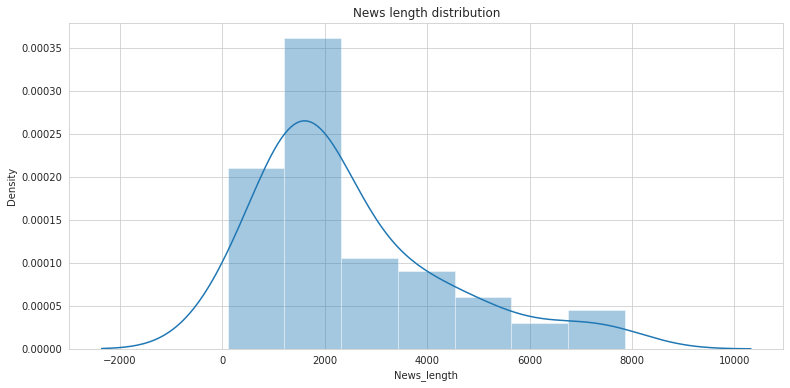

In [ ]:
df['News_length'] = df['content'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [ ]:
df['News_length'].describe()

count      60.000000
mean     2479.850000
std      1858.785669
min       105.000000
25%      1254.250000
50%      1810.000000
75%      3427.000000
max      7863.000000
Name: News_length, dtype: float64

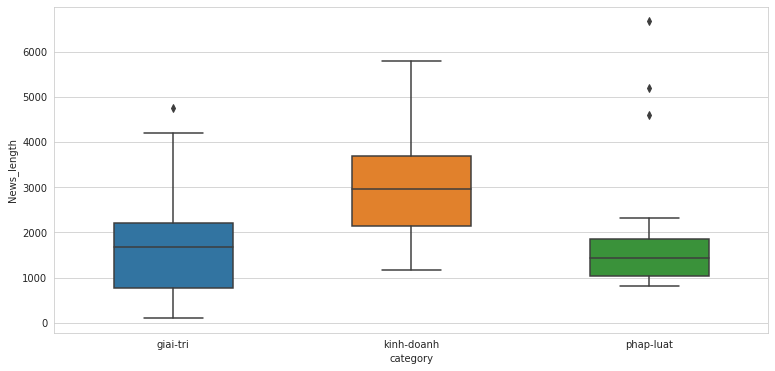

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='category', y='News_length', width=.5);

In [ ]:
with open('News_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)